In [ ]:
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import requests #The requests library for HTTP requests in Python
import math #The Python math module
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn  as sns
from plotly import express as px
import datetime as dt
import os
import pandas_datareader as data
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
# start = pd.to_datetime(['2022-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
# end = pd.to_datetime(['2022-07-18']).astype(int)[0]//10**9 # convert to unix timestamp.
# url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'AAPL' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
# df = pd.read_csv(url)

In [ ]:
data_source = 'https://query1.finance.yahoo.com/v7/finance/download/'
start_date = pd.to_datetime(['2022-01-01']).astype(int)[0]//10**9
end_date = pd.to_datetime(['2022-08-19']).astype(int)[0]//10**9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tickers = ['GOOG','AMZN','MSFT','AAPL', 'FB']

In [ ]:
Google = pd.read_csv(data_source + 'GOOG' + '?period1=' + str(start_date) + '&period2=' + str(end_date) + '&interval=1d&events=history')
Amazon = pd.read_csv(data_source + 'AMZN' + '?period1=' + str(start_date) + '&period2=' + str(end_date) + '&interval=1d&events=history')
Microsoft = pd.read_csv(data_source + 'MSFT' + '?period1=' + str(start_date) + '&period2=' + str(end_date) + '&interval=1d&events=history')
Apple = pd.read_csv(data_source + 'AAPL' + '?period1=' + str(start_date) + '&period2=' + str(end_date) + '&interval=1d&events=history')
Facebook = pd.read_csv(data_source + 'META' + '?period1=' + str(start_date) + '&period2=' + str(end_date) + '&interval=1d&events=history')

In [ ]:
df = pd.concat([Google, Amazon, Microsoft, Apple, Facebook], axis=1, keys=tickers)

In [ ]:
df.head()

GOOG                                                              \
         Date        Open        High         Low       Close   Adj Close   
0  2022-01-03  144.475494  145.550003  143.502502  145.074493  145.074493   
1  2022-01-04  145.550507  146.610001  143.816147  144.416504  144.416504   
2  2022-01-05  144.181000  144.298004  137.523499  137.653503  137.653503   
3  2022-01-06  137.497498  139.686005  136.763504  137.550995  137.550995   
4  2022-01-07  137.904999  138.254745  135.789001  137.004501  137.004501   

                   AMZN                          ...        AAPL              \
     Volume        Date        Open        High  ...       Close   Adj Close   
0  25214000  2022-01-03  167.550003  170.703506  ...  182.009995  181.259933   
1  22928000  2022-01-04  170.438004  171.399994  ...  179.699997  178.959442   
2  49642000  2022-01-05  166.882996  167.126495  ...  174.919998  174.199158   
3  29050000  2022-01-06  163.450500  164.800003  ...  172.000000  171.291183   
4  19408000  2022-01-07  163.839005  165.243500  ...  172.169998  171.460495   

                      FB                                                  \
      Volume        Date        Open        High         Low       Close   
0  104487900  2022-01-03  338.299988  341.079987  337.190002  338.540009   
1   99310400  2022-01-04  339.950012  343.089996  331.869995  336.529999   
2   94537600  2022-01-05  333.019989  335.760010  323.839996  324.170013   
3   96904000  2022-01-06  322.820007  339.170013  322.720001  332.459991   
4   86709100  2022-01-07  332.739990  337.000000  328.880005  331.790009   

                         
    Adj Close    Volume  
0  338.540009  14537900  
1  336.529999  15998000  
2  324.170013  20564500  
3  332.459991  27962800  
4  331.790009  14722000  

[5 rows x 35 columns]

In [ ]:
df.columns.names = ['Stock Ticker', 'Stock Info']
df.head()

Stock Ticker        GOOG                                                  \
Stock Info          Date        Open        High         Low       Close   
0             2022-01-03  144.475494  145.550003  143.502502  145.074493   
1             2022-01-04  145.550507  146.610001  143.816147  144.416504   
2             2022-01-05  144.181000  144.298004  137.523499  137.653503   
3             2022-01-06  137.497498  139.686005  136.763504  137.550995   
4             2022-01-07  137.904999  138.254745  135.789001  137.004501   

Stock Ticker                              AMZN                          ...  \
Stock Info     Adj Close    Volume        Date        Open        High  ...   
0             145.074493  25214000  2022-01-03  167.550003  170.703506  ...   
1             144.416504  22928000  2022-01-04  170.438004  171.399994  ...   
2             137.653503  49642000  2022-01-05  166.882996  167.126495  ...   
3             137.550995  29050000  2022-01-06  163.450500  164.800003  ...   
4             137.004501  19408000  2022-01-07  163.839005  165.243500  ...   

Stock Ticker        AAPL                                 FB              \
Stock Info         Close   Adj Close     Volume        Date        Open   
0             182.009995  181.259933  104487900  2022-01-03  338.299988   
1             179.699997  178.959442   99310400  2022-01-04  339.950012   
2             174.919998  174.199158   94537600  2022-01-05  333.019989   
3             172.000000  171.291183   96904000  2022-01-06  322.820007   
4             172.169998  171.460495   86709100  2022-01-07  332.739990   

Stock Ticker                                                            
Stock Info          High         Low       Close   Adj Close    Volume  
0             341.079987  337.190002  338.540009  338.540009  14537900  
1             343.089996  331.869995  336.529999  336.529999  15998000  
2             335.760010  323.839996  324.170013  324.170013  20564500  
3             339.170013  322.720001  332.459991  332.459991  27962800  
4             337.000000  328.880005  331.790009  331.790009  14722000  

[5 rows x 35 columns]

In [ ]:
df.xs(key='GOOG', axis=1, level='Stock Ticker') # Only GOOGLE

Stock Info,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,144.475494,145.550003,143.502502,145.074493,145.074493,25214000
1,2022-01-04,145.550507,146.610001,143.816147,144.416504,144.416504,22928000
2,2022-01-05,144.181000,144.298004,137.523499,137.653503,137.653503,49642000
3,2022-01-06,137.497498,139.686005,136.763504,137.550995,137.550995,29050000
4,2022-01-07,137.904999,138.254745,135.789001,137.004501,137.004501,19408000
...,...,...,...,...,...,...,...
153,2022-08-12,121.160004,122.650002,120.400002,122.650002,122.650002,16106600
154,2022-08-15,122.209999,123.260002,121.570000,122.879997,122.879997,15525000
155,2022-08-16,122.320000,123.227997,121.535004,122.510002,122.510002,15626200
156,2022-08-17,120.930000,122.150002,120.199997,120.320000,120.320000,17589200


In [ ]:
px.line(df.xs(key='GOOG', axis=1, level='Stock Ticker')['Close'])

In [ ]:
px.line(df.xs(key='GOOG', axis=1, level='Stock Ticker')['Close'], range_x=['2022-01-01','2022-08-19'])

In [ ]:
px.line(df.xs(key='Close', axis=1, level='Stock Info')[['GOOG', 'AMZN']])

In [ ]:
df.xs(key='Close', axis=1, level='Stock Info').head()
c = df.xs(key='Close', axis=1, level='Stock Info')
c.head()

Stock Ticker,GOOG,AMZN,MSFT,AAPL,FB
0,145.074493,170.404495,334.750000,182.009995,338.540009
1,144.416504,167.522003,329.010010,179.699997,336.529999
2,137.653503,164.356995,316.380005,174.919998,324.170013
3,137.550995,163.253998,313.880005,172.000000,332.459991
4,137.004501,162.554001,314.040009,172.169998,331.790009


In [ ]:
plt.figure(figsize=(20,10))
fig = px.line(c)
fig.show()

<Figure size 1440x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,10))
fig = px.area(c, facet_col='Stock Ticker', facet_col_wrap=3)
fig.show()

<Figure size 1440x720 with 0 Axes>

In [ ]:
fig = px.line(c, range_x=['2022-01-01','2022-08-6'])
fig.show()

In [ ]:
plt.figure(figsize=(24,16))
fig = go.Figure(data=[go.Candlestick(x=df.index, 
                open=df['GOOG']['Open'],
                high = df['GOOG']['High'],
                low = df['GOOG']['Low'],
                close = df['GOOG']['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

<Figure size 1728x1152 with 0 Axes>

In [ ]:
plt.figure(figsize=(24,16))
fig = go.Figure(data=[go.Candlestick(x=df.index, 
                open=df['AMZN']['Open'],
                high = df['AMZN']['High'],
                low = df['AMZN']['Low'],
                close = df['AMZN']['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

<Figure size 1728x1152 with 0 Axes>

In [ ]:
plt.figure(figsize=(24,16))
fig = go.Figure(data=[go.Candlestick(x=df.index, 
                open=df['MSFT']['Open'],
                high = df['MSFT']['High'],
                low = df['MSFT']['Low'],
                close = df['MSFT']['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

<Figure size 1728x1152 with 0 Axes>

In [ ]:
plt.figure(figsize=(24,16))
fig = go.Figure(data=[go.Candlestick(x=df.index, 
                open=df['AAPL']['Open'],
                high = df['AAPL']['High'],
                low = df['AAPL']['Low'],
                close = df['AAPL']['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

<Figure size 1728x1152 with 0 Axes>

In [ ]:
plt.figure(figsize=(24,16))
fig = go.Figure(data=[go.Candlestick(x=df.index, 
                open=df['FB']['Open'],
                high = df['FB']['High'],
                low = df['FB']['Low'],
                close = df['FB']['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

<Figure size 1728x1152 with 0 Axes>

In [ ]:
df.head()

Stock Ticker        GOOG                                                  \
Stock Info          Date        Open        High         Low       Close   
0             2022-01-03  144.475494  145.550003  143.502502  145.074493   
1             2022-01-04  145.550507  146.610001  143.816147  144.416504   
2             2022-01-05  144.181000  144.298004  137.523499  137.653503   
3             2022-01-06  137.497498  139.686005  136.763504  137.550995   
4             2022-01-07  137.904999  138.254745  135.789001  137.004501   

Stock Ticker                              AMZN                          ...  \
Stock Info     Adj Close    Volume        Date        Open        High  ...   
0             145.074493  25214000  2022-01-03  167.550003  170.703506  ...   
1             144.416504  22928000  2022-01-04  170.438004  171.399994  ...   
2             137.653503  49642000  2022-01-05  166.882996  167.126495  ...   
3             137.550995  29050000  2022-01-06  163.450500  164.800003  ...   
4             137.004501  19408000  2022-01-07  163.839005  165.243500  ...   

Stock Ticker        AAPL                                 FB              \
Stock Info         Close   Adj Close     Volume        Date        Open   
0             182.009995  181.259933  104487900  2022-01-03  338.299988   
1             179.699997  178.959442   99310400  2022-01-04  339.950012   
2             174.919998  174.199158   94537600  2022-01-05  333.019989   
3             172.000000  171.291183   96904000  2022-01-06  322.820007   
4             172.169998  171.460495   86709100  2022-01-07  332.739990   

Stock Ticker                                                            
Stock Info          High         Low       Close   Adj Close    Volume  
0             341.079987  337.190002  338.540009  338.540009  14537900  
1             343.089996  331.869995  336.529999  336.529999  15998000  
2             335.760010  323.839996  324.170013  324.170013  20564500  
3             339.170013  322.720001  332.459991  332.459991  27962800  
4             337.000000  328.880005  331.790009  331.790009  14722000  

[5 rows x 35 columns]

In [ ]:
g = df.xs(key='GOOG', axis=1, level='Stock Ticker')
a = df.xs(key='AAPL', axis=1, level='Stock Ticker')
z = df.xs(key='AMZN', axis=1, level='Stock Ticker')
f = df.xs(key='FB', axis=1, level='Stock Ticker')
m = df.xs(key='GOOG', axis=1, level='Stock Ticker')


In [ ]:
d = g['Date']

In [ ]:
fd = adf.astype(float)

ValueError: ignored

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [ ]:
g.head()

Stock Info,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,144.475494,145.550003,143.502502,145.074493,145.074493,25214000
1,2022-01-04,145.550507,146.610001,143.816147,144.416504,144.416504,22928000
2,2022-01-05,144.181000,144.298004,137.523499,137.653503,137.653503,49642000
3,2022-01-06,137.497498,139.686005,136.763504,137.550995,137.550995,29050000
4,2022-01-07,137.904999,138.254745,135.789001,137.004501,137.004501,19408000


In [ ]:
adf = pd.Series.to_frame(d)

In [ ]:
result = adfuller(adf.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ValueError: ignored

In [ ]:
g = g['Adj Close']
a = a['Adj Close']
z = z['Adj Close']
f = f['Adj Close']
m = m['Adj Close']

In [ ]:
tickers = ['GOOG','AMZN','MSFT','AAPL', 'FB']

In [ ]:
dd = pd.concat([g, z, m, a, f], axis=1, keys=tickers)

In [ ]:
dd.head()

,GOOG,AMZN,MSFT,AAPL,FB
0,145.074493,170.404495,145.074493,181.259933,338.540009
1,144.416504,167.522003,144.416504,178.959442,336.529999
2,137.653503,164.356995,137.653503,174.199158,324.170013
3,137.550995,163.253998,137.550995,171.291183,332.459991
4,137.004501,162.554001,137.004501,171.460495,331.790009


Daily Returns

In [ ]:
daily_returns = (dd / dd.shift(1)) -1
daily_returns.iloc[0,:] = 0
daily_returns.head()

,GOOG,AMZN,MSFT,AAPL,FB
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.004536,-0.016916,-0.004536,-0.012692,-0.005937
2,-0.046830,-0.018893,-0.046830,-0.026600,-0.036728
3,-0.000745,-0.006711,-0.000745,-0.016693,0.025573
4,-0.003973,-0.004288,-0.003973,0.000988,-0.002015


Daily Returns Global Statistics

In [ ]:
daily_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
GOOG,149.0,-0.001074,0.024570,-0.058067,-0.017958,0.000000,0.013269,0.077390
AMZN,149.0,-0.000715,0.033653,-0.140494,-0.019865,0.000000,0.021861,0.135359
MSFT,149.0,-0.001074,0.024570,-0.058067,-0.017958,0.000000,0.013269,0.077390
AAPL,149.0,-0.000381,0.021774,-0.056419,-0.016720,-0.000563,0.016112,0.069778
FB,149.0,-0.003842,0.041206,-0.263901,-0.024095,-0.002781,0.017841,0.175936


In [ ]:
# tickers = ['GOOG','AMZN','MSFT','AAPL', 'FB']

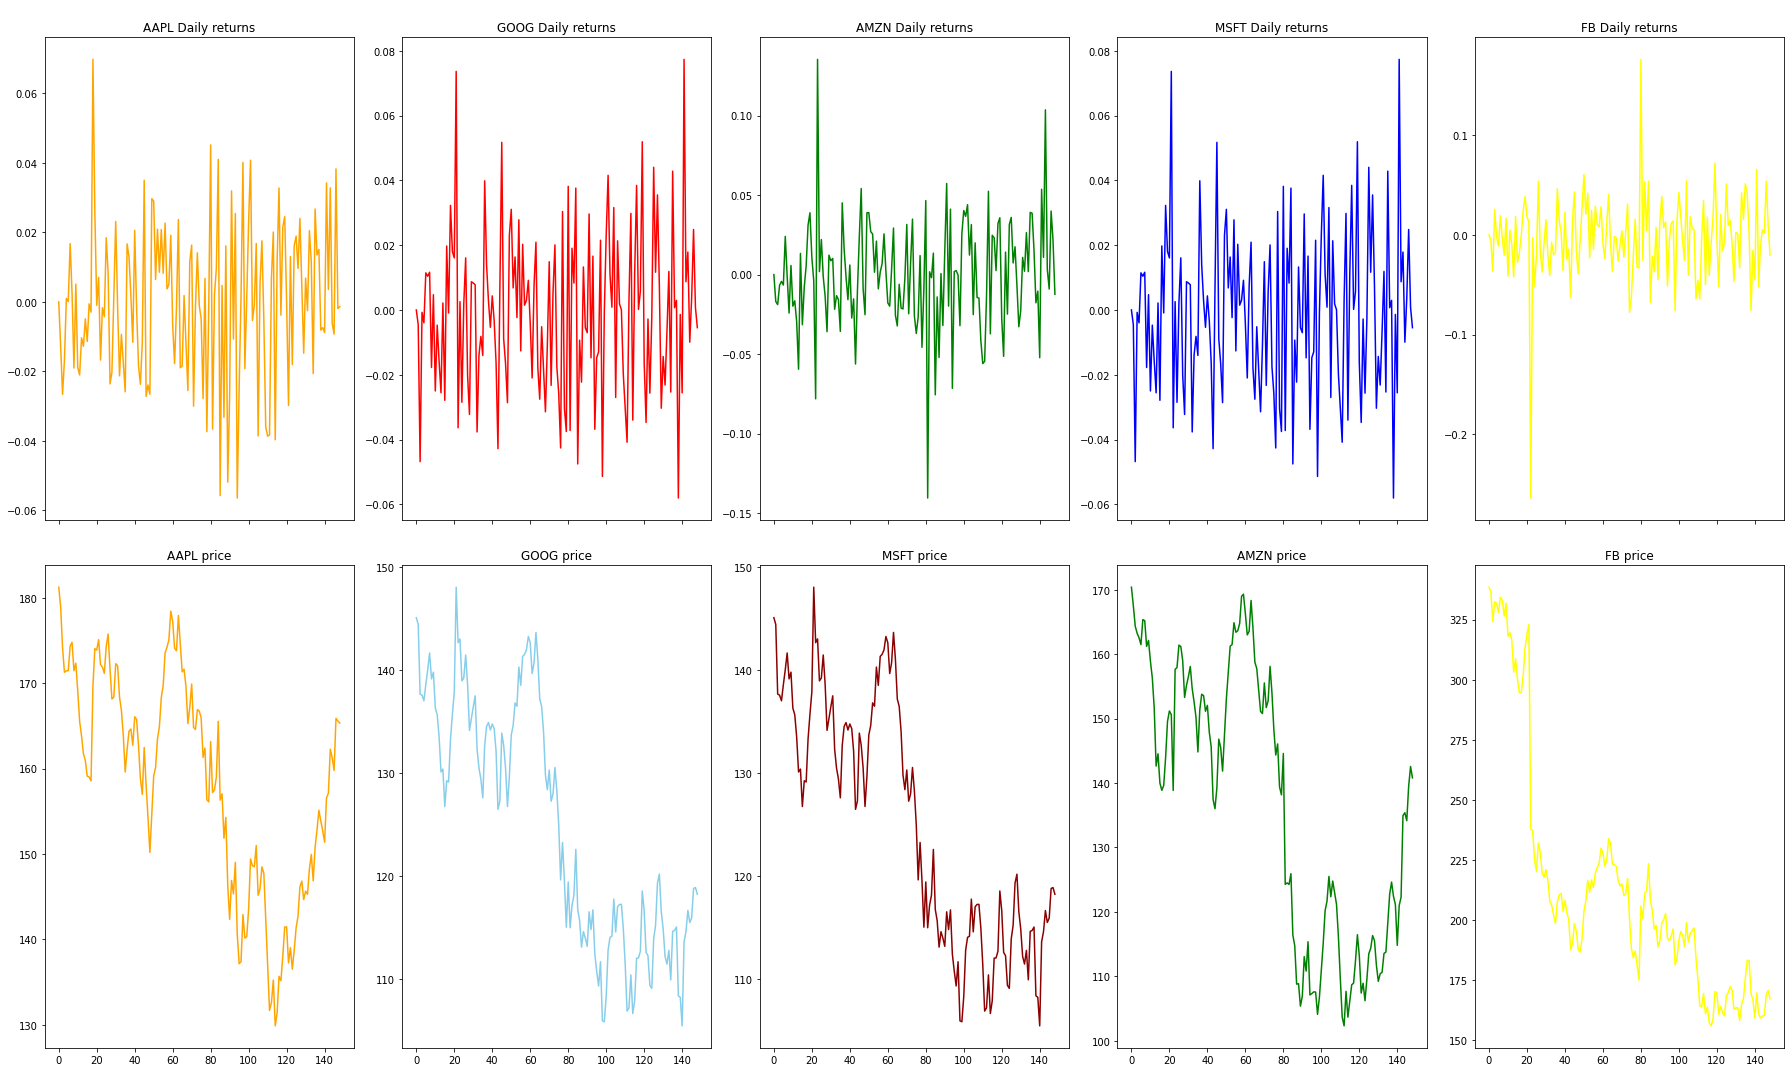

In [ ]:
fig, ax = plt.subplots(2,5,figsize=(25,15), sharex=True)

daily_returns.AAPL.plot(ax=ax[0][0], color='orange')
ax[0][0].set_title('\nAAPL Daily returns')

daily_returns.GOOG.plot(ax=ax[0][1], color='red')
ax[0][1].set_title('\nGOOG Daily returns')

daily_returns.AMZN.plot(ax=ax[0][2], color='green')
ax[0][2].set_title('\nAMZN Daily returns')

daily_returns.MSFT.plot(ax=ax[0][3], color='blue')
ax[0][3].set_title('\nMSFT Daily returns')

daily_returns.FB.plot(ax=ax[0][4], color='yellow')
ax[0][4].set_title('\nFB Daily returns')

dd.AAPL.plot(kind='line', ax=ax[1][0], color='orange')
ax[1][0].set_title('\nAAPL price')

dd.GOOG.plot(ax=ax[1][1], color='skyblue')
ax[1][1].set_title('\nGOOG price')

dd.MSFT.plot(ax=ax[1][2], color='darkred')
ax[1][2].set_title('\nMSFT price')

dd.AMZN.plot(ax=ax[1][3], color='green')
ax[1][3].set_title('\nAMZN price')

dd.FB.plot(ax=ax[1][4], color='yellow')
ax[1][4].set_title('\nFB price')

# fig.suptitle('\nDaily returns Vs. Stock prices', fontsize=10)
plt.tight_layout();

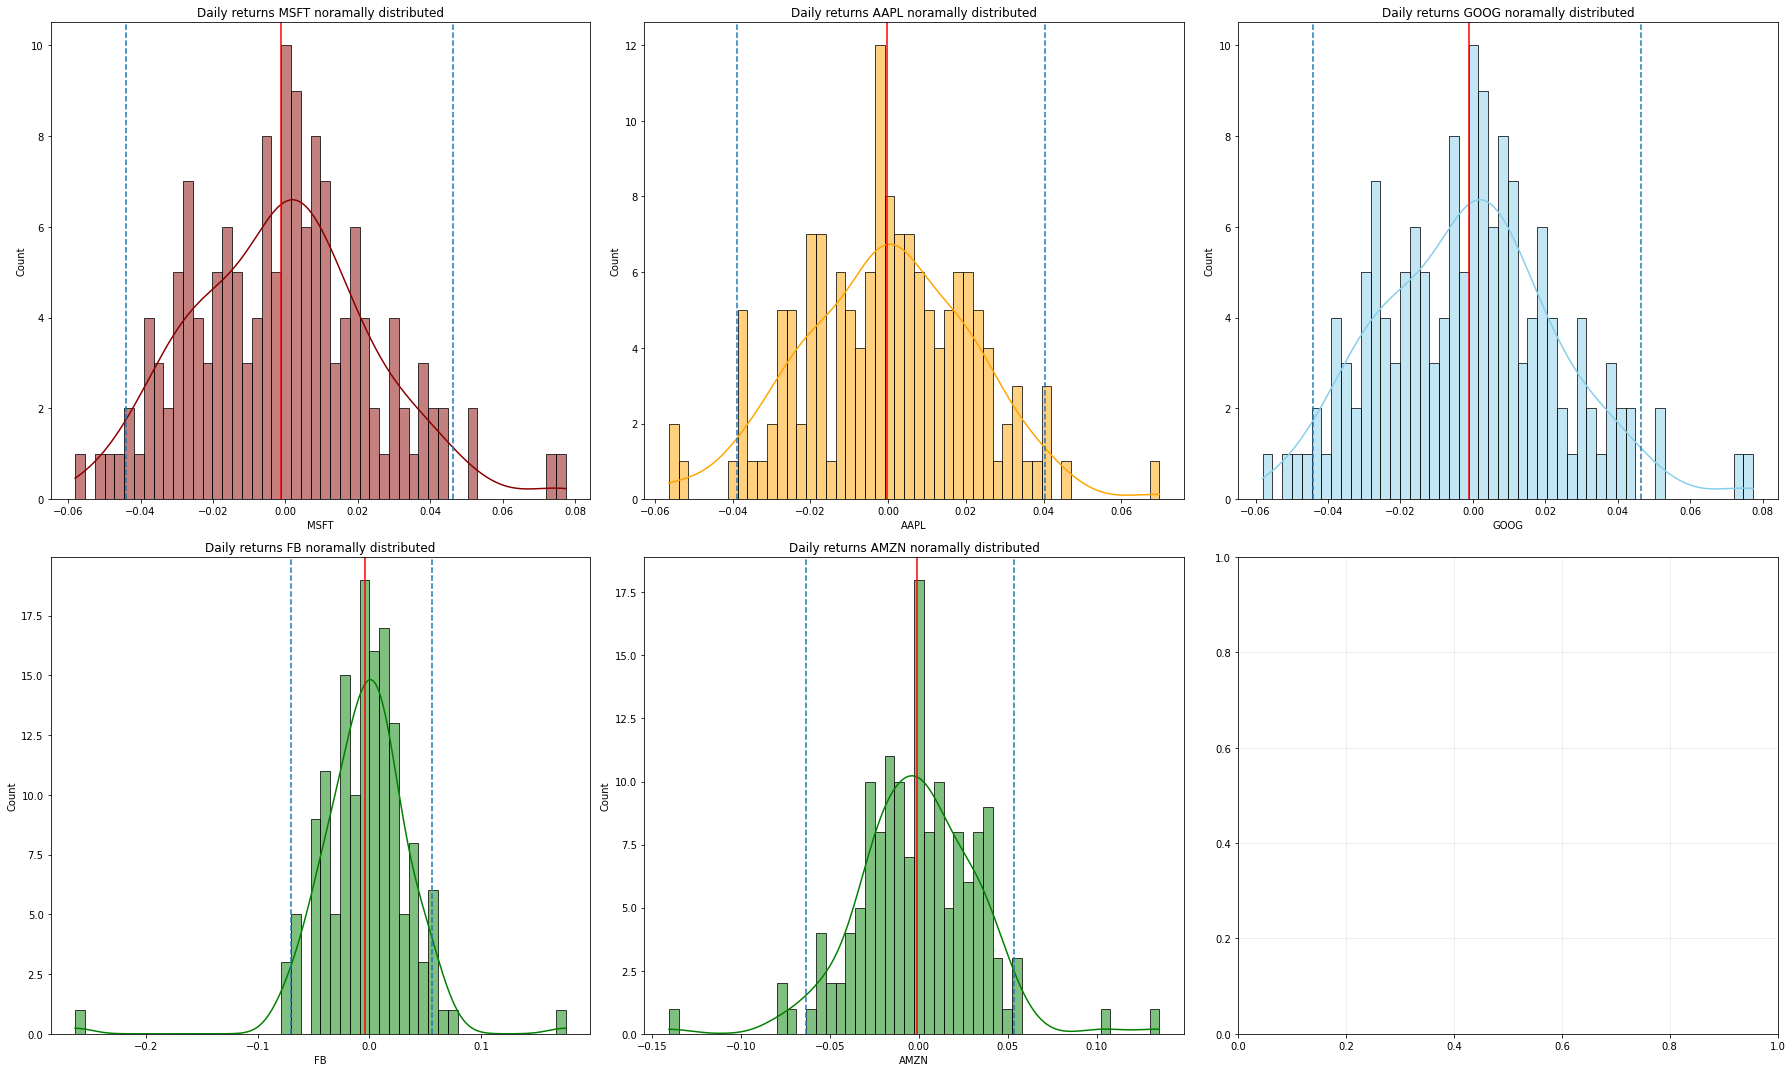

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(25,15))

# sns.displot(daily_returns)
sns.histplot(daily_returns.MSFT,bins=50, kde=True, color='darkred',  ax=ax[0][0])
ax[0][0].set_title('Daily returns MSFT noramally distributed')
# ax[0].axvline(daily_returns.MSFT.std())
# ax[0].axvline(- daily_returns.MSFT.std())
ax[0][0].axvline(np.percentile(daily_returns.MSFT,97.5), linestyle='--')
ax[0][0].axvline(np.percentile(daily_returns.MSFT,2.5), linestyle='--')
ax[0][0].axvline(daily_returns.MSFT.mean(), c='r')
# ax[0][0].text(-0.03, 20, 'STDV = {}'.format(round(daily_returns.MSFT.std(),2)))
# ax[0][0].text(-0.03, 15, 'Kurtosis = {}'.format(round(daily_returns.MSFT.kurtosis(),2)))

sns.histplot(daily_returns.AAPL, bins=50, kde=True, color='orange',  ax=ax[0][1])
ax[0][1].set_title('Daily returns AAPL noramally distributed')
# ax[1].axvline(daily_returns.AAPL.std())
# ax[1].axvline(- daily_returns.AAPL.std())
ax[0][1].axvline(daily_returns.AAPL.mean(), c='r')
ax[0][1].axvline(np.percentile(daily_returns.AAPL,97.5), linestyle='--')
ax[0][1].axvline(np.percentile(daily_returns.AAPL,2.5), linestyle='--')
# ax[0][1].text(-0.1, 20, 'STDV = {}'.format(round(daily_returns.AAPL.std(),2)))
# ax[0][1].text(-0.1, 15, 'Kurtosis = {}'.format(round(daily_returns.AAPL.kurtosis(),2)))

sns.histplot(daily_returns.GOOG, bins=50, kde=True, color='skyblue',  ax=ax[0][2])
ax[0][2].set_title('Daily returns GOOG noramally distributed')
# ax[2].axvline(daily_returns.GOOG.std())
# ax[2].axvline(- daily_returns.GOOG.std())
ax[0][2].axvline(daily_returns.GOOG.mean(), c='r')
ax[0][2].axvline(np.percentile(daily_returns.GOOG,97.5), linestyle='--')
ax[0][2].axvline(np.percentile(daily_returns.GOOG,2.5), linestyle='--')
# ax[0][2].text(-0.03, 20, 'STDV = {}'.format(round(daily_returns.GOOG.std(),2)))
# ax[0][2].text(-0.03, 15, 'Kurtosis = {}'.format(round(daily_returns.GOOG.kurtosis(),2)))

sns.histplot(daily_returns.FB, bins=50, kde=True, color='green',  ax=ax[1][0])
ax[1][0].set_title('Daily returns FB noramally distributed')
# ax[3].axvline(daily_returns.FB.std())
# ax[3].axvline(- daily_returns.FB.std())
ax[1][0].axvline(daily_returns.FB.mean(), c='r')
ax[1][0].axvline(np.percentile(daily_returns.FB,97.5), linestyle='--')
ax[1][0].axvline(np.percentile(daily_returns.FB,2.5), linestyle='--')
# ax[1][0].text(-0.03, 20, 'STDV = {}'.format(round(daily_returns.FB.std(),2)))
# ax[1][0].text(-0.03, 15, 'Kurtosis = {}'.format(round(daily_returns.FB.kurtosis(),2)))

sns.histplot(daily_returns.AMZN, bins=50, kde=True, color='green',  ax=ax[1][1])
ax[1][1].set_title('Daily returns AMZN noramally distributed')
# ax[4].axvline(daily_returns.AMZN.std())
# ax[4].axvline(- daily_returns.AMZN.std())
ax[1][1].axvline(daily_returns.AMZN.mean(), c='r')
ax[1][1].axvline(np.percentile(daily_returns.AMZN,97.5), linestyle='--')
ax[1][1].axvline(np.percentile(daily_returns.AMZN,2.5), linestyle='--')
# ax[1][1].text(-0.03, 20, 'STDV = {}'.format(round(daily_returns.AMZN.std(),2)))
# ax[1][1].text(-0.03, 15, 'Kurtosis = {}'.format(round(daily_returns.AMZN.kurtosis(),2)))

plt.grid(alpha=0.25)
plt.tight_layout();

β (Beta = Slop): is how reactive is the market to the stock.
α (Alpha = Intercept): is how well the market performs with respect to stock

ŷ
=
β
x
+
α
 
ŷ
=
B
e
t
a
∗
x
+
A
l
p
h
a
 
ŷ
=
S
l
o
p
e
∗
x
+
I
n
t
e
r
c
e
p
t
 
Coefficient Correlation and Pvalue using Numpy:

In [ ]:
beta_GOOG_MSFT, alpha_GOOG_MSFT = np.polyfit(daily_returns.GOOG, daily_returns.MSFT,1)
print('beta GOOG/MSFT= {}'.format(beta_GOOG_MSFT), 'alpha GOOG/MSFT= {}'.format(alpha_GOOG_MSFT))
beta_AAPL_FB, alpha_AAPL_FB = np.polyfit(daily_returns.AAPL, daily_returns.FB,1)
print('beta AAPL/FB= {}'.format(beta_AAPL_FB), 'alpha AAPL/FB= {}'.format(alpha_AAPL_FB))
beta_AAPL_GOOG, alpha_AAPL_GOOG = np.polyfit(daily_returns.AAPL, daily_returns.GOOG,1)
print('beta AAPL/GOOG= {}'.format(beta_AAPL_GOOG), 'alpha AAPL/GOOG= {}'.format(alpha_AAPL_GOOG))
beta_MSFT_FB, alpha_MSFT_FB = np.polyfit(daily_returns.MSFT, daily_returns.FB,1)
print('beta MSFT/FB= {}'.format(beta_MSFT_FB), 'alpha MSFT/FB= {}'.format(alpha_MSFT_FB))
beta_GOOG_FB, alpha_GOOG_FB = np.polyfit(daily_returns.GOOG, daily_returns.FB,1)
print('beta GOOG/FB= {}'.format(beta_GOOG_FB), 'alpha GOOG/FB= {}'.format(alpha_GOOG_FB))
beta_MSFT_AAPL, alpha_MSFT_AAPL = np.polyfit(daily_returns.MSFT, daily_returns.AAPL,1)
print('beta MSFT/AAPL= {}'.format(beta_MSFT_AAPL), 'alpha MSFT/AAPL= {}'.format(alpha_MSFT_AAPL))
beta_GOOG_AAPL, alpha_GOOG_AAPL = np.polyfit(daily_returns.GOOG, daily_returns.AAPL,1)
print('beta GOOG/AAPL= {}'.format(beta_GOOG_AAPL), 'alpha GOOG/AAPL= {}'.format(alpha_GOOG_AAPL))
beta_GOOG_AMZN, alpha_GOOG_AMZN = np.polyfit(daily_returns.GOOG, daily_returns.AMZN,1)
print('beta GOOG/AMZN= {}'.format(beta_GOOG_AMZN), 'alpha GOOG/AMZN= {}'.format(alpha_GOOG_AMZN))
beta_MSFT_AMZN, alpha_MSFT_AMZN = np.polyfit(daily_returns.MSFT, daily_returns.AMZN,1)
print('beta MSFT/AMZN= {}'.format(beta_MSFT_AMZN), 'alpha MSFT/AMZN= {}'.format(alpha_MSFT_AMZN))
beta_AMZN_FB, alpha_AMZN_FB = np.polyfit(daily_returns.AMZN, daily_returns.FB,1)
print('beta AMZN/FB= {}'.format(beta_AMZN_FB), 'alpha AMZN/FB= {}'.format(alpha_AMZN_FB))
# daily_returns.plot(kind='scatter', x= 'GOOG', y='MSFT')
# plt.plot(daily_returns.GOOG, beta_SPY * daily_returns.GOOG + alpha_SPY, '-', c='r');

beta GOOG/MSFT= 1.0000000000000002 alpha GOOG/MSFT= 8.405030496298926e-19
beta AAPL/FB= 1.1575028649709957 alpha AAPL/FB= -0.003401320168352311
beta AAPL/GOOG= 0.8860304920986353 alpha AAPL/GOOG= -0.0007368129903058901
beta MSFT/FB= 1.1839009665119737 alpha MSFT/FB= -0.0025703202128129006
beta GOOG/FB= 1.1839009665119737 alpha GOOG/FB= -0.0025703202128129006
beta MSFT/AAPL= 0.6958623204348655 alpha MSFT/AAPL= 0.00036675678541341376
beta GOOG/AAPL= 0.6958623204348655 alpha GOOG/AAPL= 0.00036675678541341376
beta GOOG/AMZN= 0.9578255435164398 alpha GOOG/AMZN= 0.00031366622902870647
beta MSFT/AMZN= 0.9578255435164398 alpha MSFT/AMZN= 0.00031366622902870647
beta AMZN/FB= 0.7660127633013892 alpha AMZN/FB= -0.0032941431235021007




*   When GOOG price goes up 1%, MSFT goes up by almost same amount (1%)
*   When AAPL price goes up 1%, FB goes up by 1.15%


*   When AAPL price goes up 1%, GOOG goes up by 0.85%
*   When MSFT price goes up 1%, FB goes up by 1.22%


*   When GOOG goes up by 1%, FB goes up by 1.22%
*   When MSFT goes up by 1%, AAPL goes up by 0.73%


*   When GOOG goes up by 1%, AAPL goes up by 0.73%


*   When GOOG goes up by 1%, AMZN goes up by 0.98% (almost equally)
*   When MSFT goes up by 1%, AMZN goes up by 0.98% (almost equally)


*   When AMZN goes up by 1%, FB goes up by 0.80% 













Cumulative returns ratio: is the Profit/Loss ratio of the stock on a particular period.

C
R
(
t
)
=
(
p
r
i
c
e
[
t
]
/
p
r
i
c
e
[
0
]
)
−
1
 

OR

C
R
(
t
)
=
(
p
r
i
c
e
[
t
]
−
p
r
i
c
e
[
0
]
)
p
r
i
c
e
[
0
]

In [ ]:
print('Cumulative return of MSFT is: {} %'.format(round(((dd.iloc[-1]['MSFT'] / dd.iloc[0]['MSFT']) - 1) * 100),2))
print('Cumulative return of AAPL is: {} %'.format(round(((dd.iloc[-1]['AAPL'] / dd.iloc[0]['AAPL']) - 1) * 100),2))
print('Cumulative return of FB is: {} %'.format(round(((dd.iloc[-1]['FB'] / dd.iloc[0]['FB']) - 1) * 100),2))
print('Cumulative return of GOOG is: {} %'.format(round(((dd.iloc[-1]['GOOG'] / dd.iloc[0]['GOOG']) - 1) * 100),2))
print('Cumulative return of AMZN is: {} %'.format(round(((dd.iloc[-1]['AMZN'] / dd.iloc[0]['AMZN']) - 1) * 100),2))

Cumulative return of MSFT is: -19 %
Cumulative return of AAPL is: -9 %
Cumulative return of FB is: -51 %
Cumulative return of GOOG is: -19 %
Cumulative return of AMZN is: -17 %


In [ ]:
norm = dd / dd.iloc[0,:]
norm.head()

,GOOG,AMZN,MSFT,AAPL,FB
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995464,0.983084,0.995464,0.987308,0.994063
2,0.948847,0.964511,0.948847,0.961046,0.957553
3,0.948140,0.958038,0.948140,0.945003,0.982040
4,0.944373,0.953930,0.944373,0.945937,0.980061


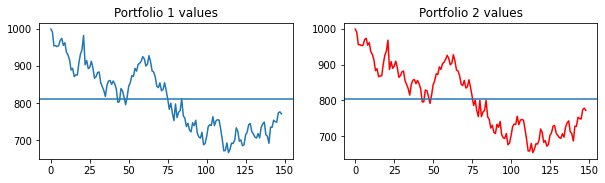

In [ ]:
def portval (allocations = [], start_value = 0):
    
    allocs = norm.copy() * allocations
    pos_val = allocs * 1000
    port_val = pos_val.sum(axis=1)
    return port_val

# assume our start value = $ 1000
fig, ax = plt.subplots(1,2,figsize=(10,2.5))

port_val = portval([0.2,0.1,0.3, 0.2, 0.2], 1000)
port_val.plot(ax=ax[0])
ax[0].axhline(np.mean(port_val))
ax[0].set_title('Portfolio 1 values')

port_val2 = portval([0.2, 0.2, 0.2, 0.2, 0.2], 1000)
port_val2.plot(ax=ax[1], color='red')
ax[1].axhline(np.mean(port_val2))
ax[1].set_title('Portfolio 2 values');

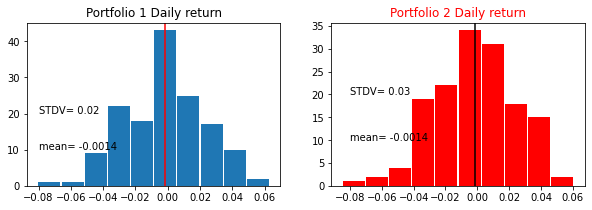

In [ ]:
portfolio_daily_returns = (port_val / port_val.shift(1)) - 1
portfolio_daily_returns = portfolio_daily_returns.iloc[1:]

portfolio_daily_returns2 = (port_val2 / port_val2.shift(1)) - 1
portfolio_daily_returns2 = portfolio_daily_returns2.iloc[1:]

fig, ax = plt.subplots(1,2,figsize=(10,2.5))

portfolio_daily_returns.hist(figsize=(5,3), grid=False, rwidth=0.95, ax=ax[0])
ax[0].axvline(np.mean(portfolio_daily_returns), c='r')
ax[0].text(-0.08, 10, 'mean= {}'.format(round(np.mean(portfolio_daily_returns),4)))
ax[0].text(-0.08, 20, 'STDV= {}'.format(round(np.std(portfolio_daily_returns),2)))
ax[0].set_title('Portfolio 1 Daily return')

portfolio_daily_returns2.hist(figsize=(10,3), grid=False, rwidth=0.95, color='r', ax=ax[1])
ax[1].axvline(np.mean(portfolio_daily_returns2), c='black')
ax[1].text(-0.08, 10, 'mean= {}'.format(round(np.mean(portfolio_daily_returns2),4)))
ax[1].text(-0.08, 20, 'STDV= {}'.format(round(np.std(portfolio_daily_returns2),2)))
ax[1].set_title('Portfolio 2 Daily return', c='r');

In [ ]:
cum_return = ((port_val.iloc[-1] / port_val.iloc[0]) -1) * 100 
print('Cumulative return of Portfolio 1 is {} %'.format(round(cum_return),2))
cum_return2 = ((port_val2.iloc[-1] / port_val2.iloc[0]) -1) * 100 
print('Cumulative return of Portfolio 2 is {} %'.format(round(cum_return2),2))

Cumulative return of Portfolio 1 is -23 %
Cumulative return of Portfolio 2 is -23 %


In [ ]:
print('Mean of Portfolio 1 (Return) = {}'.format(round(np.mean(portfolio_daily_returns) * 100,2)),'%', '  ' , 'Standard Deviation 1 (Risk) = {}'.format(round(np.std(portfolio_daily_returns) * 100,2)),'%')
print('Mean of Portfolio 2 (Return) = {}'.format(round(np.mean(portfolio_daily_returns2) * 100,2)),'%', '   ' , 'Standard Deviation 2 (Risk) = {}'.format(round(np.std(portfolio_daily_returns2) * 100,2)),'%')

Mean of Portfolio 1 (Return) = -0.14 %    Standard Deviation 1 (Risk) = 2.46 %
Mean of Portfolio 2 (Return) = -0.14 %     Standard Deviation 2 (Risk) = 2.51 %


In [ ]:
print('Mean of Portfolio 1 (Return) = {}'.format(round(np.mean(port_val.iloc[1:]),2)), ' ' , 'Standard Deviation  1  (Risk) = {}'.format(round(np.std(port_val.iloc[1:]),2)))
print('Mean of Portfolio 2 (Return) = {}'.format(round(np.mean(port_val2.iloc[1:]),2)), '  ' ,'Standard Deviation  2  (Risk) = {}'.format(round(np.std(port_val2.iloc[1:]),2)))

Mean of Portfolio 1 (Return) = 809.33   Standard Deviation  1  (Risk) = 86.87
Mean of Portfolio 2 (Return) = 803.44    Standard Deviation  2  (Risk) = 90.62


We can notice clearly that the return of portfolio 1 is higher than portfolio 2 (-0.22% P1 vs. -0.23% P2), and the risk (STDV) is lower

SHARPE RATIO:
It is a metric that evaluates risk and returns together in order to help investors in the selection of such investment that generates higher returns for the optimal risk taken.

The Higher the sharpe ratio the better


In [ ]:
SR = round( np.sqrt(252) * (np.mean(portfolio_daily_returns))/ np.std(portfolio_daily_returns),2)
print('Sharpe Ratio 1 = {}%'.format(SR),)
SR2 = round( np.sqrt(252) * (np.mean(portfolio_daily_returns2))/ np.std(portfolio_daily_returns2),2)
print('Sharpe Ratio 2 = {}%'.format(SR2))

Sharpe Ratio 1 = -0.93%
Sharpe Ratio 2 = -0.9%


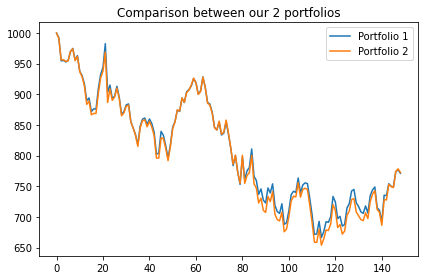

In [ ]:
fig, ax = plt.subplots()
port_val.plot(ax=ax)
port_val2.plot(ax=ax)
plt.legend(['Portfolio 1', 'Portfolio 2'])
plt.title('Comparison between our 2 portfolios')
# plt.text('2022-01', 1100,'Portofolio 1 value = {}$'.format(round(port_val.max(),2)), color='darkblue')
# plt.text('2022-07', 1050,'Portofolio 2 value = {}$'.format(round(port_val2.max(),2)), color='darkorange')
plt.tight_layout();